<a href="https://colab.research.google.com/github/surajpreetham/Data_science_codes/blob/main/House_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn import metrics

In [215]:
dataset = sklearn.datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [216]:
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [217]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [218]:
df['price'] = dataset.target

In [219]:
df.shape

(506, 14)

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [221]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Outlier Detection

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


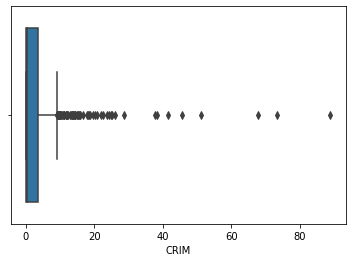

In [222]:
sns.boxplot('CRIM',data=df)

In [223]:
df = df[df['CRIM']<10]

In [224]:
q1 = df['CRIM'].quantile(0.1)
q3 = df['CRIM'].quantile(0.9)
IQR = q3-q1
print(q1,q3,IQR)

0.035871 5.669619 5.633748


In [225]:
df = df[(df['CRIM']>q1-1.5*IQR) & (df['CRIM']<q3+1.5*IQR)]

In [226]:
df.shape

(452, 14)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


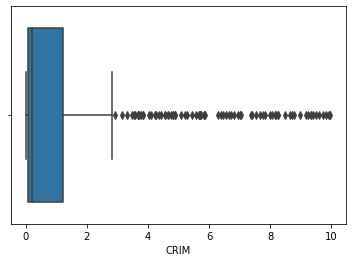

In [227]:
sns.boxplot('CRIM',data=df)

In [228]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,1.420825,12.721239,10.304889,0.077434,0.540816,6.343538,65.557965,4.043570,7.823009,377.442478,18.247124,369.826504,11.441881,23.750442
std,2.495894,24.326032,6.797103,0.267574,0.113816,0.666808,28.127025,2.090492,7.543494,151.327573,2.200064,68.554439,6.156437,8.808602
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,6.300000
25%,0.069875,0.000000,4.930000,0.000000,0.447000,5.926750,40.950000,2.354750,4.000000,276.750000,16.800000,377.717500,6.587500,18.500000
50%,0.191030,0.000000,8.140000,0.000000,0.519000,6.229000,71.800000,3.550400,5.000000,307.000000,18.600000,392.080000,10.250000,21.950000
75%,1.211460,20.000000,18.100000,0.000000,0.605000,6.635000,91.625000,5.401100,7.000000,411.000000,20.200000,396.157500,15.105000,26.600000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.410000,50.000000


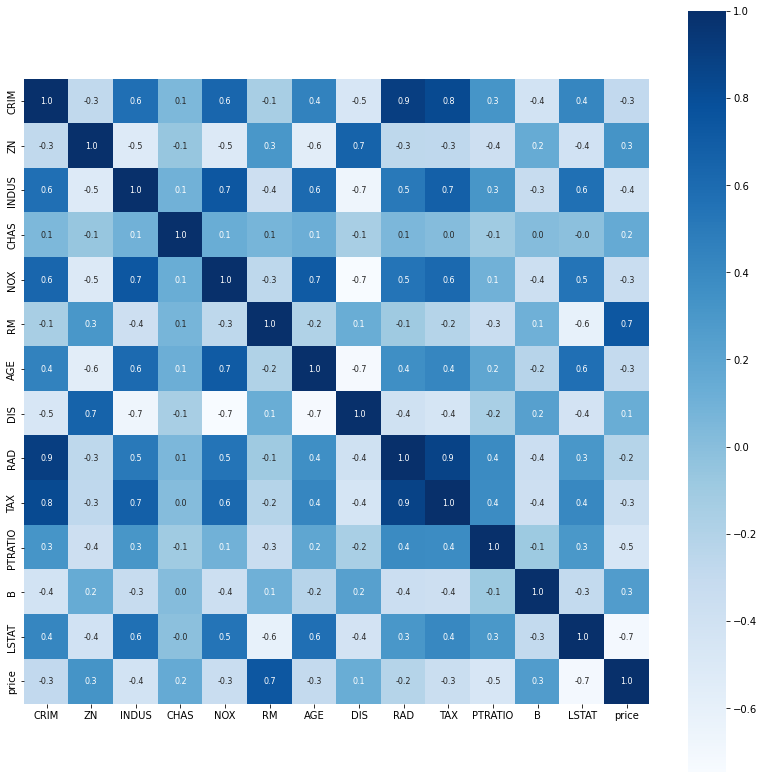

In [229]:
corr = df.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [230]:
X = df.drop('price',axis=1)
y = df['price']

In [231]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)


XGBoost Regressor

In [232]:
model = XGBRegressor()
model.fit(X_train,y_train)


[12:40:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Evaluation

In [233]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
train_score_1 = metrics.r2_score(train_pred,y_train)
test_score_1 = metrics.r2_score(test_pred,y_test)
train_score_2 = metrics.mean_absolute_error(train_pred,y_train)
test_score_2 = metrics.mean_absolute_error(test_pred,y_test)
print(train_score_1,test_score_1)
print(train_score_2,test_score_2)

0.9709174652015156 0.8507617591692869
1.0987878155825759 2.4455806732177736


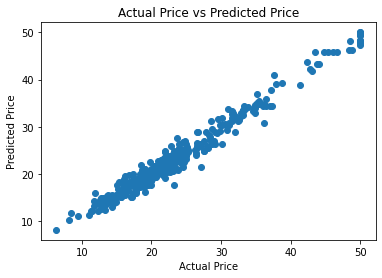

In [234]:
plt.scatter(y_train,train_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()


In [235]:
print(y_test.shape,test_pred.shape)

(46,) (46,)


In [236]:
test_error = y_test-test_pred
train_error = y_train-train_pred
print(test_error.size)

46


In [237]:
X_train['Prediction'] = train_pred
X_test['Prediction'] = test_pred

In [238]:
X_combined = np.r_[X_train, X_test]
y_combined = np.r_[y_train, y_test]

In [239]:
y_combined = y_combined[:452]

In [240]:
df1 = np.c_[X_combined,y_combined]

In [241]:
df1.shape

(452, 15)

In [242]:
df2 = pd.DataFrame(df1)

In [243]:
df2.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.40771,0.0,6.20,1.0,0.507,6.164,91.3,3.0480,8.0,307.0,17.4,395.24,21.46,19.781527,21.7
1,4.54192,0.0,18.10,0.0,0.770,6.398,88.0,2.5182,24.0,666.0,20.2,374.56,7.79,23.246941,25.0
2,4.75237,0.0,18.10,0.0,0.713,6.525,86.5,2.4358,24.0,666.0,20.2,50.92,18.13,14.899229,14.1
3,4.42228,0.0,18.10,0.0,0.584,6.003,94.5,2.5403,24.0,666.0,20.2,331.29,21.32,16.140903,19.1
4,0.13117,0.0,8.56,0.0,0.520,6.127,85.2,2.1224,5.0,384.0,20.9,387.69,14.09,20.100937,20.4
5,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87,35.799732,36.4
6,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34,23.883659,22.6
7,0.61154,20.0,3.97,0.0,0.647,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,49.618465,50.0
8,0.17331,0.0,9.69,0.0,0.585,5.707,54.0,2.3817,6.0,391.0,19.2,396.90,12.01,20.859119,21.8
9,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,396.90,14.10,19.911003,18.3


In [139]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [140]:
lr_pred = lr.predict(X_test)

In [143]:
score = metrics.r2_score(lr_pred,y_test)
score

0.5023777338507134

In [144]:
error = metrics.mean_absolute_error(lr_pred,y_test)
error

3.60760816874383